<a href="https://colab.research.google.com/github/RizkyaSalsabila/Assignment-Sem5_ML_Rizkya-Salsabila/blob/main/praktikum_11/TG11_2341720056_Rizkya_Salsabila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRAKTIKUM 1 - Klasifikasi SVM dengan Data Dummy Linier

## Langkah 1 - Import Library

In [9]:
# Library untuk perhitungan numerik dan manipulasi array/matriks
import numpy as np

# Library untuk visualisasi statistik yang berbasis matplotlib
import seaborn as sns

# Library untuk membuat grafik dan plot 2D
import matplotlib.pyplot as plt

# Modul untuk analisis statistik dan fungsi distribusi probabilitas
from scipy import stats

## Langkah 2 - Membuat Data Dummy

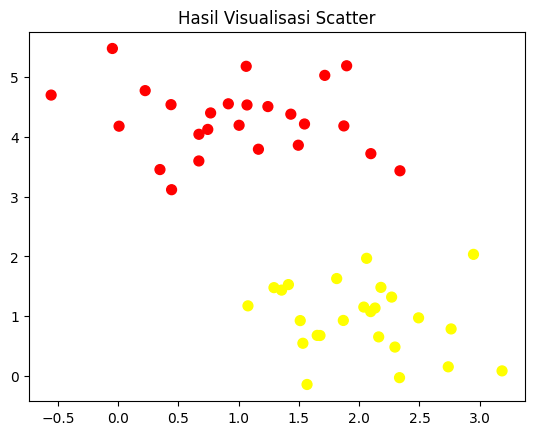

In [8]:
# Import fungsi untuk membuat dataset sintetis berbasis cluster
from sklearn.datasets import make_blobs

# Membuat dataset sintetis dengan ,  standar deviasi cluster 0.60, dan
X, y = make_blobs(
    n_samples=50,   # 50 sampel
    centers=2,      # 2 cluster
    random_state=0, # seed random 0
    cluster_std=0.60
)

# Memberi judul pada plot
plt.title("Hasil Visualisasi Scatter")

# Membuat scatter plot, warna sesuai label y, ukuran titik 50, colormap 'autumn'
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# Menampilkan plot
plt.show()

## Langkah 3 - Buat Ilustrasi Garis Pemisah

## Langkah 4 - Ilustrasi Margin

(-1.0, 3.5)

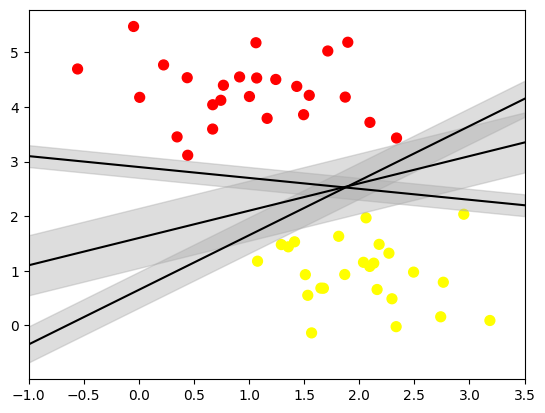

In [16]:
# membuat array xfit untuk sumbu x dari -1 hingga 3.5
xfit = np.linspace(-1, 3.5)

# membuat sactter plot dataset, warna sesuai label y, ukuran titik 50, colormap 'autumn
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# loop untuk menggambar garis dan area bayangan untuk beberapa parameter slope, intercept, dan deviasi
for m, b, d, in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
  # menghitung nilai y sesuai garis y = m*x + b
  yfit = m * xfit + b
  # menggambar garis hitam
  plt.plot(xfit, yfit, '-k')
  # mengisi area bayangan di sekitar garis dari yfit-d hingga yfit+d
  plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

# menentukan batas sumbu x dari -1 hingga 3.5
plt.xlim(-1, 3.5)

## Langkah 5 - Fitting Model

### 1. Pelatihan terhadap model SVM

In [17]:
from sklearn.svm import SVC     # SVC kepanjangan dari support vector classifier
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

### 2. Visualisasi hasil fit model

In [21]:
# fungsi untuk menampilkan fitting data
def plot_svc_decision_function(model, ax=None, plot_support=True):
  if ax is None:
    ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  # grid untuk evaluasi model
  x = np.linspace(xlim[0], xlim[1], 30)
  y = np.linspace(ylim[0], ylim[1], 30)
  Y, X = np.meshgrid(y, x)
  xy = np.vstack([X.ravel(), Y.ravel()]).T
  P = model.decision_function(xy).reshape(X.shape)

  # plot batas margin
  ax.contour(X, Y, P, colors='k',
             levels=[-1, 0, 1], alpha=0.5,
             linestyles=['--', '-', '--'])

  # plot support vectors
  if plot_support:
    ax.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s=300, linewidth=1, facecolors='none');
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

### 3. Hasil Plotting

/tmp/ipython-input-1280604313.py:16: UserWarning: The following kwargs were not used by contour: 'lineStyles'
  ax.contour(X, Y, P, colors='k',


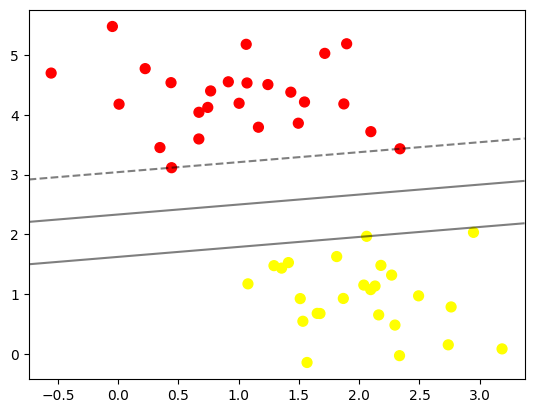

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)